In [ ]:
#@title Run to Prepare Data { display-mode: "form" }
# import gdown
# gdown.download(" https://drive.google.com/uc?id=1tKGq6FBACRv2razgZxKi_64nWhpHjrU4","birds", True)
# ! unzip birds
!pip install -q kaggle
from google.colab import files
import os.path
if (os.path.exists("kaggle.json")):
  print("Token exists")
else:
  files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download gpiosenka/100-bird-species
!unzip 100-bird-species.zip -d /content/Bird_Dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/043.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/044.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/045.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/046.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/047.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/048.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/049.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/050.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/051.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/052.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/053.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/054.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/055.jpg  
  inflating: /content/Bird_Dataset/train/TURQUOISE MOTMOT/056.jpg

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAvgPool2D, Dropout, BatchNormalization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import pathlib
import math

In [ ]:
train_dir = pathlib.Path('./Bird_Dataset/train')
val_dir = pathlib.Path('./Bird_Dataset/valid')
test_dir = pathlib.Path('./Bird_Dataset/test')

train_image_count = len(list(train_dir.glob('*/*.jpg')))
print(train_image_count)

47332


In [ ]:
batch_size = 32
image_width = 224
image_height = 224

#creates a complete dataset from directory structure ready to use
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    batch_size = batch_size,
    image_size = (image_width, image_height)
)
print(train_ds)
val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    batch_size = batch_size,
    image_size = (image_width, image_height)
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    batch_size = batch_size,
    image_size = (image_width, image_height)
)



Found 47332 files belonging to 325 classes.
<BatchDataset shapes: ((None, 224, 224, 3), (None, 325)), types: (tf.float32, tf.float32)>
Found 1625 files belonging to 325 classes.
Found 1625 files belonging to 325 classes.


In [ ]:
class_names = train_ds.class_names
print(len(class_names))

325


TypeError: ignored

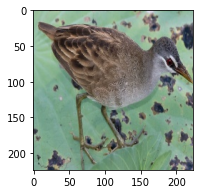

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
def create_model(input_shape=(image_width,image_height,3)):
    model = Sequential()
    #Input layer, each neuron gets exactly 1 image (batch size of 32 images)
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape, padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(325, activation='softmax'))

    return model


NameError: ignored

In [ ]:
def compile_model(model):
  model.compile(optimizer='adam',loss='categorical_crossentropy', metrics="accuracy")
  return model

In [ ]:
def plot_training_curves(history):
    # Training curves
    import matplotlib.pyplot as plt

    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs_x = range(1, len(loss_values) + 1)
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
    plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation Loss and Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(2,1,2)
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
    plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
    #plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [ ]:
model = create_model((image_width, image_height,3))
model = compile_model(model)

history = model.fit(train_ds, validation_data=val_ds, shuffle=True, epochs=20)
model.save("tf_cnn_bird.model")

Epoch 1/2
1480/1480 [==============================] - 157s 99ms/step - loss: 5.7311 - accuracy: 0.0213 - val_loss: 4.9139 - val_accuracy: 0.0578
Epoch 2/2
1480/1480 [==============================] - 144s 97ms/step - loss: 4.5488 - accuracy: 0.0972 - val_loss: 3.6531 - val_accuracy: 0.2111
INFO:tensorflow:Assets written to: tf_cnn_bird.model/assets


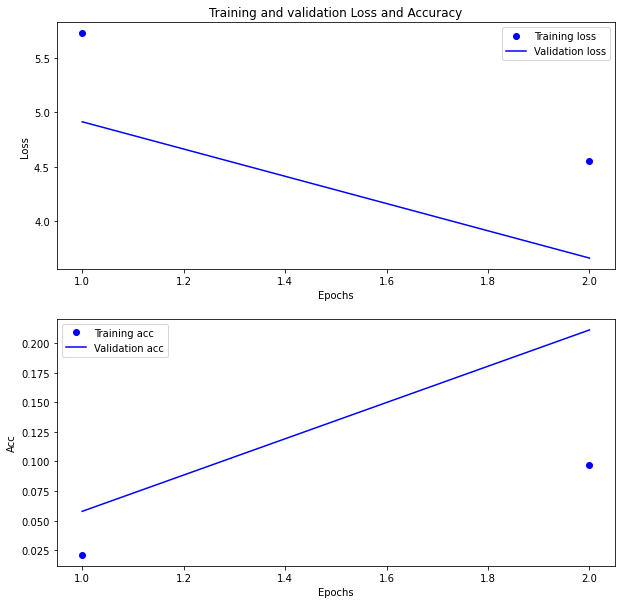

In [ ]:
plot_training_curves(history)

In [ ]:
evaluation = model.evaluate(test_ds)
probabilities = model.predict(test_ds)
finalLabels = probabilities.argmax(axis=-1)
for i in range(len(class_names)):
  print(sorted(class_names)[finalLabels[i]])

51/51 [==============================] - 3s 45ms/step - loss: 3.6212 - accuracy: 0.2105
HARPY EAGLE
RED FACED CORMORANT
AMERICAN AVOCET
EURASIAN GOLDEN ORIOLE
PUFFIN
QUETZAL
MARABOU STORK
NORTHERN GANNET
BROWN THRASHER
HORNED SUNGEM
SWINHOES PHEASANT
SRI LANKA BLUE MAGPIE
GROVED BILLED ANI
CAPE GLOSSY STARLING
BANDED BROADBILL
OSTRICH
CURL CRESTED ARACURI
MALACHITE KINGFISHER
MANGROVE CUCKOO
EMPEROR PENGUIN
GREEN BROADBILL
RAZORBILL
EASTERN MEADOWLARK
SPANGLED COTINGA
CAPE GLOSSY STARLING
SPOON BILED SANDPIPER
BLACK FRANCOLIN
BLACK TAIL CRAKE
MIKADO  PHEASANT
COLLARED ARACARI
LAZULI BUNTING
PATAGONIAN SIERRA FINCH
GOLD WING WARBLER
RED HONEY CREEPER
INCA TERN
RING-NECKED PHEASANT
IWI
KAKAPO
SCARLET CROWNED FRUIT DOVE
YELLOW CACIQUE
COCKATOO
PYGMY KINGFISHER
MIKADO  PHEASANT
EMPEROR PENGUIN
CALIFORNIA QUAIL
KOOKABURRA
TRUMPTER SWAN
PEACOCK
OSTRICH
MARABOU STORK
BLACK VULTURE
GOLDEN CHEEKED WARBLER
GAMBELS QUAIL
ARARIPE MANAKIN
WILD TURKEY
RAINBOW LORIKEET
RED HEADED WOODPECKER
BANDED PI

In [ ]:
datagen = ImageDataGenerator(rescale=1/255)

train_gen = datagen.flow_from_directory(train_dir, target_size=(224, 224))
val_gen = datagen.flow_from_directory(val_dir, target_size=(224,224))
test_gen = datagen.flow_from_directory(test_dir, target_size=(224,224))

train_groups = len(train_gen)
val_groups = len(val_gen)

Found 47332 images belonging to 325 classes.
Found 1625 images belonging to 325 classes.
Found 1625 images belonging to 325 classes.


In [ ]:
def create_modelv2(input_shape=(image_width,image_height,3)):
    model = Sequential()
    #Input layer, each neuron gets exactly 1 image (batch size of 32 images)

    model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape, padding='same'))
    #model.add(BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=input_shape, padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    #model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    
  
    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding='same'))
    #model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(layers.Flatten())
    model.add(Dropout(0.35))
    #model.add(layers.Dense(120, activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(325, activation='softmax'))

    return model

In [ ]:
modelv2 = create_modelv2((image_width, image_height,3))
modelv2 = compile_model(modelv2)

#SGD optimizer preformed worse than adam optimizer!!!!
history2 = modelv2.fit(train_gen,
                      validation_data=val_gen, shuffle=True, epochs=40, verbose=1)

model.save("tf_cnn_bird2.model")

Epoch 1/40
  19/1480 [..............................] - ETA: 7:52 - loss: 8.5954 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import load_model
import shutil
testModel = load_model("tf_cnn_bird.model")

OSError: ignored

In [ ]:
newFiles = files.upload()
!mkdir ./newTests
!mkdir ./newTests/uploadedImages
for name in newFiles.keys():
  shutil.move(name, "./newTests/uploadedImages/" + name)

Saving test.jpg to test.jpg
mkdir: cannot create directory ‘./newTests’: File exists
mkdir: cannot create directory ‘./newTests/uploadedImages’: File exists


In [ ]:
uploaded_tests = keras.preprocessing.image_dataset_from_directory(
    pathlib.Path("./newTests"),
    label_mode='categorical',
    batch_size = batch_size,
    image_size = (image_width, image_height)
)
uploadProb = model.predict(uploaded_tests)
uploadLabels = uploadProb.argmax(axis=-1)
for i in range(len(uploadLabels)):
  print(sorted(class_names)[uploadLabels[i]])

Found 2 files belonging to 2 classes.
OSTRICH
TRUMPTER SWAN
